# <p align="center"> **Análise das extrações com REGEX e Modelo de Linguagem** 📈 </p>
 
##### <p align="center">**Autores:**  Lorena Ribeiro Nascimento & Glauber Nascimento de Oliveira</p>
##### <p align="center">**Orientador:**  James Morais de Almeida  </p>
 

In [38]:
import pandas as pd
import matplotlib.pyplot as plt 
import regex as re

In [39]:
regex_val = pd.read_excel('regex_nanotox_validacao.xlsx')
regex_completo = pd.read_excel('regex_nanotox_completo.xlsx')

In [40]:
ML_val = pd.read_excel('nanotoxicology_data.xlsx')
ML_comp = pd.read_excel('nanotoxicology_df.xlsx')

In [41]:
regex_val

,Composição,Toxicidade,Tamanho,Tipo celular,Sentenças
0,"['Co', 'NPs', 'Th', 'NPs', 'A', 'Eg', 'Th', 'T...","['8.92 mg/mL', '10 mg/mL', '8.92 mg/mL', '2.5 ...","['32.63 +/- 14.59 nm', '42.73 +/- 3.5 nm']","['The cell', 'NEAA-1', 'NEAA-1', 'FCCD', 'FCCD...",['Collagen nanoparticles (collagen-NPs) are pr...
1,"['Co', 'NPs', 'Th', 'NPs', 'A', 'Eg', 'Th', 'T...","['8.92 mg/mL', '10 mg/mL', '8.92 mg/mL', '2.5 ...","['32.63 +/- 14.59 nm', '42.73 +/- 3.5 nm']","['The cell', 'NEAA-1', 'NEAA-1', 'FCCD', 'FCCD...",['Collagen nanoparticles (collagen-NPs) are pr...
2,"['Co', 'NPs', 'Th', 'NPs', 'A', 'Eg', 'Th', 'T...","['8.92 mg/mL', '10 mg/mL', '8.92 mg/mL', '2.5 ...","['32.63 +/- 14.59 nm', '42.73 +/- 3.5 nm']","['The cell', 'NEAA-1', 'NEAA-1', 'FCCD', 'FCCD...",['Collagen nanoparticles (collagen-NPs) are pr...
3,"['In', 'Go', 'Au-NPs', 'Th', 'Au-NPs', 'Mo', '...","['50 mu g/mL', '25 mu g/mL', '50 mu g/mL', '50...","['540 nm', '30 nm']","['A549 cell', 'IC50', 'ROS', 'DAPI', 'ROS', 'I...",['Introduction Gold nanoparticles (Au-NPs) hol...
4,"['Th', 'ZnO', 'NPs', 'Fi', 'NPs', 'Th', 'ZnO',...","['7.5 mu g/mL', '42 mu g/mL', '250 mu g/mL', '...","['370 nm', '11 nm']","['UV', 'FTIR', 'XRD', 'TEM', 'EDAX', 'UV', 'SE...",['The present study aimed to environmentally f...
5,"['Do', 'DOX', 'In', 'DOX', 'Th', 'DOX', 'In', ...","['4.78 mu ', '5.26 mu ', '4.62 mu ', '5.06 mu ']","['267.28 +/- 0.38 nm', '280.00 nm']","['DOX', 'DOX', 'DOX', 'DOX', 'DOX', 'DOX', 'IP...",['Doxorubicin hydrochloride (DOX) is an anthra...
6,"['Th', 'Ag', 'ZnO', 'NPs', 'Po', 'Ma', 'Et', '...","['8.05 mg ', '15.13 mg ', '11.91 +/- 0.46 mu g...","['9.71-12.32 nm', '18.20-23.75 nm']","['TPC', 'GAE', 'QE', 'IC50', 'IC50', 'BSLA', '...",['This research successfully demonstrated the ...
7,"['Th', 'Ag', 'ZnO', 'NPs', 'Po', 'Ma', 'Et', '...","['8.05 mg ', '15.13 mg ', '11.91 +/- 0.46 mu g...","['9.71-12.32 nm', '18.20-23.75 nm']","['TPC', 'GAE', 'QE', 'IC50', 'IC50', 'BSLA', '...",['This research successfully demonstrated the ...
8,"['In', 'PbO-NPs', 'Oc', 'Th', 'PbO-NPs', 'FTIR...",['485.8 mu g/mL'],['20-30 nm'],"['FTIR', 'TGA-DTA', 'XRD', 'UV', 'EDX', 'FESEM...","['In the present study, lead oxide nanoparticl..."
9,"['Di', 'In', 'D', 'Ph', 'UV', 'FT-IR', 'SEM', ...",['5 mu g/mL'],['100 nm'],"['UV', 'FT-IR', 'SEM', 'DLS', 'A549 lung adeno...",['Dictyota ciliolata is a brown alga rich in b...


In [42]:
acertos_tam_regex = 0
for tamanho in regex_val['Tamanho']:
    if tamanho != '[]':
        acertos_tam_regex += 1

acertos_tam_regex 

30

In [43]:
acertos_toxic_regex = 0
for toxic in regex_val['Toxicidade']:
    if toxic != '[]':
        acertos_toxic_regex += 1

acertos_toxic_regex

27

In [44]:
ML_val.head(10)

,Composition,Nanoparticle Size,Toxicity,Type of Cells
0,Collagen,"32.6 nm, 42.7 nm","11.6 μg/mL, 19.6 μg/mL, 41.7 μg/mL","MCF‑7, HeP‑G2, HCT116"
1,"Au, Collagen","30 nm, 32.6 nm, 42.7 nm","50, 11.62, 19.60, 41.67","A549, MCF‑7, Hep‑G2, HCT116"
2,Collagen,32.63 nm,"11.62 µg/mL, 19.60 µg/mL, 41.67 µg/mL","MCF‑7, HepG2, HCT116"
3,Au 100%,30 nm,50 µg/mL,A549
4,ZnO,11 nm,35.50 µg/mL,MDA‑MB‑231
5,NaN,267.28 nm,NaN,"HepG2, SGC7901"
6,"Ag], [Zn O","9.71‑12.32 nm (Ag‑NPs), 18.20‑23.75 nm (ZnO‑NPs)",118.36 µg/mL (Ag‑NPs IC₅₀ vs cervical cancer c...,cervical‑cancer cell lines
7,"Ag], [Zn, O","9.71–12.32 nm] (Ag‑NPs), [18.20–23.75 nm] (ZnO...",118.36 µg/mL] (Ag against cervical cancer cell...,"cervical cancer cell lines], [lung cancer cells"
8,"Pb 50%, O 50%",20–30 nm,485.8 µg/mL,CT‑26
9,NaN,NaN,NaN,NaN


In [45]:
acertos_tam_ML = 0
for tamanho in ML_val['Nanoparticle Size']:
    if pd.notna(tamanho) != False:
        acertos_tam_ML += 1

acertos_tam_ML

26

In [46]:
acertos_toxic_ML = 0
for toxic in ML_val['Toxicity']:
    if pd.notna(toxic) != False:
        acertos_toxic_ML += 1

acertos_toxic_ML

25

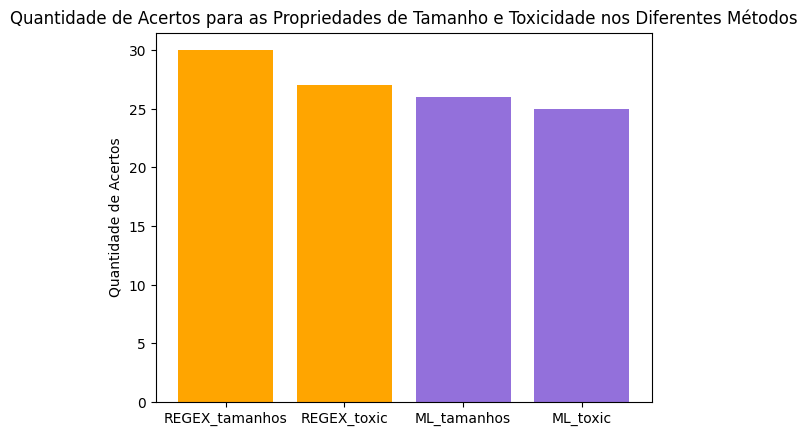

In [47]:
plt.figure()
plt.bar(['REGEX_tamanhos', 'REGEX_toxic'], [acertos_tam_regex, acertos_toxic_regex], color = 'orange')
plt.bar(['ML_tamanhos', 'ML_toxic'], [acertos_tam_ML, acertos_toxic_ML], color = 'mediumpurple')
plt.title("Quantidade de Acertos para as Propriedades de Tamanho e Toxicidade nos Diferentes Métodos")
plt.ylabel('Quantidade de Acertos')
plt.show()

## REGEX da coluna de Toxicidade

In [48]:
ML_comp

,Composition,Nanoparticle Size,Toxicity,Type of Cells
0,poly‑styrene,"50 nm, 100 nm, 1000 nm","peroxidase activity (increased), antioxidant p...",Mya arenaria
1,SiO2,"20 nm, 50 nm",Mortality rate (monitoring): 0% at 400 µg/mL; ...,Rat (Sprague Dawley)
2,polystyrene (PS),"50 nm, 100 nm",Behavioral changes detected by EEG power spect...,zebrafish larvae (Danio rerio)
3,Au,"14 nm, 20 nm",NaN,"Caco-2, HaCaT"
4,Ag,"40 nm, 70 nm","silver mass per cell (40 nm, 100 ng mL⁻¹) = 1....",U937
...,...,...,...,...
3002,Au,56.4 nm,MTT assay – IC50 value not reported; Apoptosis...,A549 lung cancer cells
3003,"Fe3O4, PDA, Ni2+, COX-2",250-300 nm,NaN,NaN
3004,Ag,15.56 nm] (± 9.22 nm),NaN,"Escherichia coli ATCC 25922, Escherichia coli ..."
3005,1-palmitoyl-2-oleoyl-glycero-3-phosphocholine ...,"100 nm, 120 nm",IC50 (cathepsin B‑overexpressing cancer cells)...,4T1 murine breast cancer cells (cathepsin B‑ov...


In [49]:

dados_para_df_comp = []
df_com_toxicidade = ML_comp.copy()

df_com_toxicidade['Toxicidade_Extraida'] = df_com_toxicidade['Toxicity'].apply(
    lambda text: re.findall(r"\b\d+(?:\.\d+)?(?:\s*(?:\+/-|±)\s*\d+(?:\.\d+)?)?\s*(?:mu|µ|ug|mg)\s*[gL]?(?:/mL|\s*mL\(-1\)|/ml)?\b", str(text)))

df_com_toxicidade

,Composition,Nanoparticle Size,Toxicity,Type of Cells,Toxicidade_Extraida
0,poly‑styrene,"50 nm, 100 nm, 1000 nm","peroxidase activity (increased), antioxidant p...",Mya arenaria,[]
1,SiO2,"20 nm, 50 nm",Mortality rate (monitoring): 0% at 400 µg/mL; ...,Rat (Sprague Dawley),"[400 µg/mL, 400 µg/mL]"
2,polystyrene (PS),"50 nm, 100 nm",Behavioral changes detected by EEG power spect...,zebrafish larvae (Danio rerio),[]
3,Au,"14 nm, 20 nm",NaN,"Caco-2, HaCaT",[]
4,Ag,"40 nm, 70 nm","silver mass per cell (40 nm, 100 ng mL⁻¹) = 1....",U937,[]
...,...,...,...,...,...
3002,Au,56.4 nm,MTT assay – IC50 value not reported; Apoptosis...,A549 lung cancer cells,[]
3003,"Fe3O4, PDA, Ni2+, COX-2",250-300 nm,NaN,NaN,[]
3004,Ag,15.56 nm] (± 9.22 nm),NaN,"Escherichia coli ATCC 25922, Escherichia coli ...",[]
3005,1-palmitoyl-2-oleoyl-glycero-3-phosphocholine ...,"100 nm, 120 nm",IC50 (cathepsin B‑overexpressing cancer cells)...,4T1 murine breast cancer cells (cathepsin B‑ov...,[]


In [50]:
len(df_com_toxicidade['Toxicidade_Extraida'][1])

2

In [51]:
acertos_tox_regex = 0
for toxic in df_com_toxicidade['Toxicidade_Extraida']:
    if len(toxic) > 0:
        acertos_tox_regex += 1

acertos_tox_regex 

575

In [52]:
df_com_toxicidade = df_com_toxicidade[df_com_toxicidade['Toxicidade_Extraida'].apply(lambda x: len(x) > 0)].reset_index(drop=True)
df_com_toxicidade

,Composition,Nanoparticle Size,Toxicity,Type of Cells,Toxicidade_Extraida
0,SiO2,"20 nm, 50 nm",Mortality rate (monitoring): 0% at 400 µg/mL; ...,Rat (Sprague Dawley),"[400 µg/mL, 400 µg/mL]"
1,"ZnO, Cur, ZnOcur","88.41 nm, 122 nm, 53.81 nm, 98 nm, 43.41 nm, 1...",LD50: 425.4 mg/kg,NaN,[425.4 mg]
2,Ag,"5, 10, 20, 40, 55, 60, 70, 75, 80, 100] nm",Mortality observed for spherical AgNPs (AgNSs)...,Danio rerio embryos (embryonic zebrafish),"[6 mg , 12 mg ]"
3,Ag-Se,"18.1 nm, 72.0 nm, 30.58 nm",Protein discharge (S. aureus): 244.21 μg/mL (a...,"Staphylococcus aureus, Escherichia coli, Pseud...",[1 mg/mL]
4,ZnO,"20 nm, 40 nm, 60 nm, 300 nm","LC50 20 nm ZnO 1.68 mg/L (acute toxicity), LC5...",Daphnia magna,"[1.68 mg, 1.71 mg, 2.93 mg, 3.24 mg, 6.35 mg, ..."
...,...,...,...,...,...
570,Ni,"53.7 nm, 70.9 nm",Acute oral toxicity – LD50 (Ni NP2): 1600 mg/k...,NaN,"[1600 mg, 2000 mg, 10 mg, 0.1 mg, 1 mg, 0.1 mg..."
571,Se(0) 100 %,94 nm,Ag/Se(0)NPs – bacteriostatic activity ≈ 60 % i...,Clavibacter michiganensis sepedonicus (bacteri...,[6.25 µg]
572,Ag,20‑30 nm,"LDH release (increased, p < 0.05)]; [microprot...",A549,"[810 µg, 957 µg]"
573,Au,30 nm,IC50: 50 µg/mL,A549,[50 µg/mL]


In [53]:
df_com_toxicidade.to_excel("nanotox_extracao_final.xlsx", index=False)

In [54]:
df_com_toxicidade['Nanoparticle Size']

0                                           20 nm, 50 nm
1      88.41 nm, 122 nm, 53.81 nm, 98 nm, 43.41 nm, 1...
2             5, 10, 20, 40, 55, 60, 70, 75, 80, 100] nm
3                             18.1 nm, 72.0 nm, 30.58 nm
4                            20 nm, 40 nm, 60 nm, 300 nm
                             ...                        
570                                     53.7 nm, 70.9 nm
571                                                94 nm
572                                             20‑30 nm
573                                                30 nm
574                                               2–8 nm
Name: Nanoparticle Size, Length: 575, dtype: object

In [55]:
'''Normalizando as extrações'''

def extrair_tamanhos(texto):
    if pd.isna(texto):
        return []
    # pega números (inclusive intervalos e decimais) antes de nm/µm
    matches = re.findall(r"(\d+(?:\.\d+)?)", str(texto))  # encontra os números (inclusive intervalos e decimais) antes de nm/µm
    return [float(m) for m in matches]


In [56]:
# aplica para cada linha
df_com_toxicidade["Size_List"] = df_com_toxicidade["Nanoparticle Size"].apply(extrair_tamanhos)

# Transformar listas em linhas
df_tamanhos = df_com_toxicidade.explode("Size_List").dropna(subset=["Size_List"])
df_tamanhos["Size_List"] = df_tamanhos["Size_List"].astype(float)


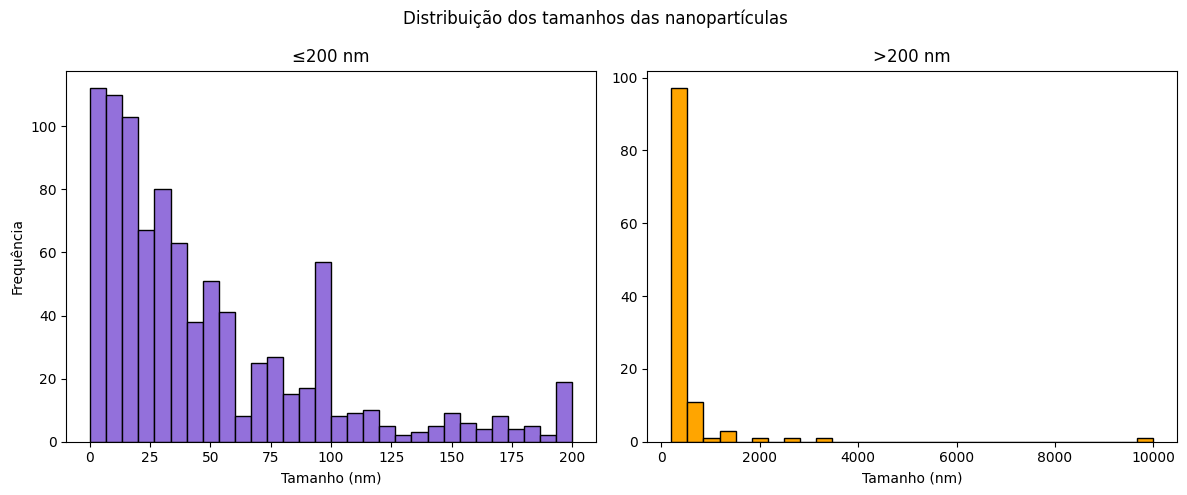

In [64]:
'''Plotando os dados'''
fig, axes = plt.subplots(1, 2, figsize=(12,5))

# até 200 nm
axes[0].hist(df_tamanhos[df_tamanhos["Size_List"] <= 200]["Size_List"], bins=30, edgecolor="black", color = 'mediumpurple')
axes[0].set_title("≤200 nm")
axes[0].set_xlabel("Tamanho (nm)")
axes[0].set_ylabel("Frequência")

# acima de 200 nm
axes[1].hist(df_tamanhos[df_tamanhos["Size_List"] > 200]["Size_List"], bins=30, edgecolor="black", color = 'orange')
axes[1].set_title(">200 nm")
axes[1].set_xlabel("Tamanho (nm)")

plt.suptitle("Distribuição dos Tamanhos das Nanopartículas")
plt.tight_layout()
plt.show()


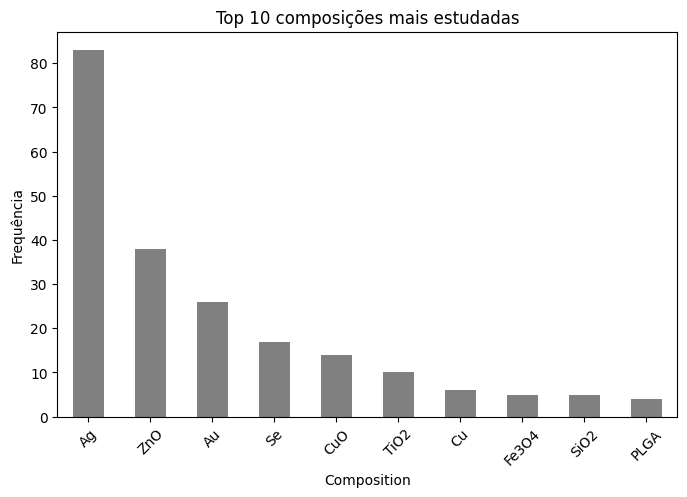

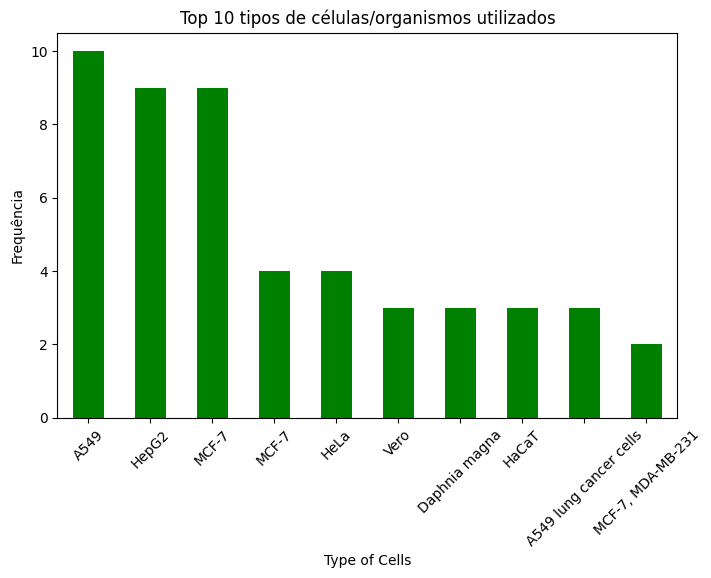

In [67]:
# --- 3. Frequência de composições mais estudadas --- #
plt.figure(figsize=(8,5))
df_com_toxicidade["Composition"].value_counts().head(10).plot(kind="bar", color = 'grey')
plt.title("Top 10 composições mais estudadas")
plt.ylabel("Frequência")
plt.xticks(rotation=45)
plt.show()

# --- 4. Tipos de células/organismos mais usados --- #
plt.figure(figsize=(8,5))
df_com_toxicidade["Type of Cells"].dropna().value_counts().head(10).plot(kind="bar", color = 'green')
plt.title("Top 10 tipos de células/organismos utilizados")
plt.ylabel("Frequência")
plt.xticks(rotation=45)
plt.show()